# **Cross-selling Recommendations for Banking Products** 
### (Analyzed by: Jesumbo Joseph Oludipe)

## **Problem Description:**
XYZ Credit Union, a prominent financial institution in Latin America, has been successful in selling various banking products including credit cards, deposit accounts, retirement accounts, and safe deposit boxes. However, despite the initial success, the existing customers do not show any inclination to purchase more than one product. This indicates that the bank is not effectively utilizing the opportunity of cross-selling to its customers. To address this issue, XYZ Credit Union has sought the assistance of JB Analytics to analyze the data and provide actionable insights to increase cross-selling.

## **Business Understanding:**
Based on the given problem statement, while XYZ Credit Union has been successful in selling a variety of banking products in Latin America, they have not been able to capitalize on cross-selling opportunities. Despite having a large customer base, the bank's existing customers do not purchase more than one product, which is indicative of a lack of effective cross-selling strategies. This project aims to identify the factors that affect cross-selling, understand customer behavior, and propose strategies that can improve the bank's overall performance in selling multiple products to its existing customers.

In [62]:
# Import required libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the dataset using pandas pd.read_csv
df = pd.read_csv(r"C:\Users\Oludipe j\Documents\Data Analysis\Data Glacier\Cross Selling\Train.csv", low_memory=False)

df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [3]:
# Set to display all columns
pd.set_option('display.max_columns', None)

df.head(3)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


## **Data Understanding:**
The dataset that has been provided includes comprehensive customer information such as age, gender, and country of residence, alongside the various bank products that they currently own, such as credit cards, deposit accounts, retirement accounts, safe deposit boxes, and more. In total, the dataset comprises 48 features (columns) and 13647308 observations (rows), offering a large volume of data for analysis and providing valuable insights into the bank's customer base and product preferences.

## **Data Cleaning:**
As a data analyst, I recognize the importance of data cleaning to ensure that the data is accurate and reliable for any downstream analysis or use. XYZ Credit Union is also a Latina American American bank which made a lot of the column names and data values to be written in spanish, these words or abbrieviations had to be translated to English for better understanding.


In [4]:
# Check all column names

print(df.columns)

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')


In [5]:
# Change all column names to appropriate and descriptive ones. Also from Spanish to English

df = df.rename(columns={'fecha_dato': 'data_date', 'ncodpers': 'customer_id', 'ind_empleado': 'employee_index', 'pais_residencia': 'country_of_residence', 'sexo': 'gender',
       'fecha_alta': 'date_joined', 'ind_nuevo': 'new_customer', 'antiguedad': 'customer_seniority', 'indrel': 'primary_index',
       'ult_fec_cli_1t': 'last_date_as_primary', 'indrel_1mes': 'customer_type', 'tiprel_1mes': 'customer_relation', 'indresi': 'resident', 'indext': 'foreigner',
       'conyuemp': 'employee_spouse', 'canal_entrada': 'channel', 'indfall': 'deceased', 'tipodom': 'address_type', 'cod_prov': 'province_code',
       'nomprov': 'province_name', 'ind_actividad_cliente': 'activity_index', 'renta': 'gross_household_income', 'segmento': 'customer_segment',
       'ind_ahor_fin_ult1': 'saving_acc', 'ind_aval_fin_ult1': 'guarantees', 'ind_cco_fin_ult1': 'current_acc',
       'ind_cder_fin_ult1': 'derivative_acc', 'ind_cno_fin_ult1': 'payroll_acc', 'ind_ctju_fin_ult1': 'junior_acc',
       'ind_ctma_fin_ult1': 'more_particular_acc', 'ind_ctop_fin_ult1': 'particular_acc', 'ind_ctpp_fin_ult1': 'particular_plus_acc',
       'ind_deco_fin_ult1': 'short_term_deposits', 'ind_deme_fin_ult1': 'medium_term_deposits', 'ind_dela_fin_ult1': 'long_term_deposits',
       'ind_ecue_fin_ult1': 'e_account', 'ind_fond_fin_ult1': 'funds', 'ind_hip_fin_ult1': 'mortgage',
       'ind_plan_fin_ult1': 'pensions_plan', 'ind_pres_fin_ult1': 'loans', 'ind_reca_fin_ult1': 'taxes',
       'ind_tjcr_fin_ult1': 'credit_card', 'ind_valo_fin_ult1': 'securities', 'ind_viv_fin_ult1': 'home_acc',
       'ind_nomina_ult1': 'payroll', 'ind_nom_pens_ult1': 'pensions', 'ind_recibo_ult1': 'direct_debit'})

print(df.columns)

Index(['data_date', 'customer_id', 'employee_index', 'country_of_residence',
       'gender', 'age', 'date_joined', 'new_customer', 'customer_seniority',
       'primary_index', 'last_date_as_primary', 'customer_type',
       'customer_relation', 'resident', 'foreigner', 'employee_spouse',
       'channel', 'deceased', 'address_type', 'province_code', 'province_name',
       'activity_index', 'gross_household_income', 'customer_segment',
       'saving_acc', 'guarantees', 'current_acc', 'derivative_acc',
       'payroll_acc', 'junior_acc', 'more_particular_acc', 'particular_acc',
       'particular_plus_acc', 'short_term_deposits', 'medium_term_deposits',
       'long_term_deposits', 'e_account', 'funds', 'mortgage', 'pensions_plan',
       'loans', 'taxes', 'credit_card', 'securities', 'home_acc', 'payroll',
       'pensions', 'direct_debit'],
      dtype='object')


In [6]:
# View Table
df.head(2)

,data_date,customer_id,employee_index,country_of_residence,gender,age,date_joined,new_customer,customer_seniority,primary_index,last_date_as_primary,customer_type,customer_relation,resident,foreigner,employee_spouse,channel,deceased,address_type,province_code,province_name,activity_index,gross_household_income,customer_segment,saving_acc,guarantees,current_acc,derivative_acc,payroll_acc,junior_acc,more_particular_acc,particular_acc,particular_plus_acc,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_plan,loans,taxes,credit_card,securities,home_acc,payroll,pensions,direct_debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [7]:
# Convert values in the gender column from "H" and "V" to "M" and "F" to standardize the data.

df['gender'] = df['gender'].replace({'H': 'M', 'V': 'F'})

df.head(3)

,data_date,customer_id,employee_index,country_of_residence,gender,age,date_joined,new_customer,customer_seniority,primary_index,last_date_as_primary,customer_type,customer_relation,resident,foreigner,employee_spouse,channel,deceased,address_type,province_code,province_name,activity_index,gross_household_income,customer_segment,saving_acc,guarantees,current_acc,derivative_acc,payroll_acc,junior_acc,more_particular_acc,particular_acc,particular_plus_acc,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_plan,loans,taxes,credit_card,securities,home_acc,payroll,pensions,direct_debit
0,2015-01-28,1375586,N,ES,M,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,F,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,F,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [8]:
# Convert the "S" and "N" values to "Yes" and "No" to make them more explicit.
df['resident'] = df['resident'].replace({'S': 'Yes', 'N': 'No'})

df['foreigner'] = df['foreigner'].replace({'S': 'Yes', 'N': 'No'})

df['deceased'] = df['deceased'].replace({'S': 'Yes', 'N': 'No'})

df.head(3)

,data_date,customer_id,employee_index,country_of_residence,gender,age,date_joined,new_customer,customer_seniority,primary_index,last_date_as_primary,customer_type,customer_relation,resident,foreigner,employee_spouse,channel,deceased,address_type,province_code,province_name,activity_index,gross_household_income,customer_segment,saving_acc,guarantees,current_acc,derivative_acc,payroll_acc,junior_acc,more_particular_acc,particular_acc,particular_plus_acc,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_plan,loans,taxes,credit_card,securities,home_acc,payroll,pensions,direct_debit
0,2015-01-28,1375586,N,ES,M,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,Yes,No,NaN,KHL,No,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,F,23,2012-08-10,0.0,35,1.0,NaN,1,I,Yes,Yes,NaN,KHE,No,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,F,23,2012-08-10,0.0,35,1.0,NaN,1,I,Yes,No,NaN,KHE,No,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [9]:
# Convert the values in a customer_segment column from '01 - TOP' to VIP, '02 - PARTICULARES' to Individuals,
#and 03 - UNIVERSITARIO to College Graduate.

# Define a dictionary to map the old values to the new values
mapping_dict = {
    '01 - TOP': 'VIP',
    '02 - PARTICULARES': 'Individuals',
    '03 - UNIVERSITARIO': 'College Graduate'
}

# Replace the old values in the 'customer_segment' column with the new values using the mapping dictionary
df['customer_segment'] = df['customer_segment'].replace(mapping_dict)

df.head(3)

,data_date,customer_id,employee_index,country_of_residence,gender,age,date_joined,new_customer,customer_seniority,primary_index,last_date_as_primary,customer_type,customer_relation,resident,foreigner,employee_spouse,channel,deceased,address_type,province_code,province_name,activity_index,gross_household_income,customer_segment,saving_acc,guarantees,current_acc,derivative_acc,payroll_acc,junior_acc,more_particular_acc,particular_acc,particular_plus_acc,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_plan,loans,taxes,credit_card,securities,home_acc,payroll,pensions,direct_debit
0,2015-01-28,1375586,N,ES,M,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,Yes,No,NaN,KHL,No,1.0,29.0,MALAGA,1.0,87218.10,Individuals,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,F,23,2012-08-10,0.0,35,1.0,NaN,1,I,Yes,Yes,NaN,KHE,No,1.0,13.0,CIUDAD REAL,0.0,35548.74,College Graduate,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,F,23,2012-08-10,0.0,35,1.0,NaN,1,I,Yes,No,NaN,KHE,No,1.0,13.0,CIUDAD REAL,0.0,122179.11,College Graduate,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [10]:
# Check data types for all columns
print(df.dtypes)

data_date                  object
customer_id                 int64
employee_index             object
country_of_residence       object
gender                     object
age                        object
date_joined                object
new_customer              float64
customer_seniority         object
primary_index             float64
last_date_as_primary       object
customer_type              object
customer_relation          object
resident                   object
foreigner                  object
employee_spouse            object
channel                    object
deceased                   object
address_type              float64
province_code             float64
province_name              object
activity_index            float64
gross_household_income    float64
customer_segment           object
saving_acc                  int64
guarantees                  int64
current_acc                 int64
derivative_acc              int64
payroll_acc                 int64
junior_acc    

In [60]:
#Convert columns to appropriate datatypes

#Convert 'data_date' column to a datetime format 
df['data_date'] = pd.to_datetime(df['data_date'])

df['date_joined'] = pd.to_datetime(df['date_joined'])

# Replace invalid or missing values with NaN
df['age'] = df['age'].replace(' NA', np.nan)

# Convert the 'age' column from object to float
df['age'] = df['age'].astype(float)

# Check data types for all columns
print(df.dtypes)

data_date                 datetime64[ns]
customer_id                        int64
employee_index                    object
country_of_residence              object
gender                            object
age                              float64
date_joined                       object
new_customer                     float64
customer_seniority                object
primary_index                    float64
last_date_as_primary              object
customer_type                     object
customer_relation                 object
resident                          object
foreigner                         object
employee_spouse                   object
channel                           object
deceased                          object
address_type                     float64
province_code                    float64
province_name                     object
activity_index                   float64
gross_household_income           float64
customer_segment                  object
saving_acc      

In [ ]:
#Check for missing data

print(df.isnull().sum())

In [14]:
# Drop rows with missing data
df = df.dropna(subset=['gender'])


In [15]:
#Check for missing data

print(df.isnull().sum())

data_date                        0
customer_id                      0
employee_index                   0
country_of_residence             0
gender                           0
age                              0
date_joined                      0
new_customer                     0
customer_seniority               0
primary_index                    0
last_date_as_primary      13594712
customer_type               122047
customer_relation           122047
resident                         0
foreigner                        0
employee_spouse           13617697
channel                     158391
deceased                         0
address_type                     1
province_code                65857
province_name                65857
activity_index                   0
gross_household_income     2766607
customer_segment            161633
saving_acc                       0
guarantees                       0
current_acc                      0
derivative_acc                   0
payroll_acc         

In [35]:
# Creating a dataframe with unique customer ID with most recent data date.
df_sorted = df.loc[df.groupby('customer_id')['data_date'].idxmax()]

df_sorted

,data_date,customer_id,employee_index,country_of_residence,gender,age,date_joined,new_customer,customer_seniority,primary_index,last_date_as_primary,customer_type,customer_relation,resident,foreigner,employee_spouse,channel,deceased,address_type,province_code,province_name,activity_index,gross_household_income,customer_segment,saving_acc,guarantees,current_acc,derivative_acc,payroll_acc,junior_acc,more_particular_acc,particular_acc,particular_plus_acc,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_plan,loans,taxes,credit_card,securities,home_acc,payroll,pensions,direct_debit
13026343,2016-05-28,15889,F,ES,F,56.0,1995-01-16,0.0,255,1.0,NaN,1,A,Yes,No,N,KAT,No,1.0,28.0,MADRID,1.0,326124.90,VIP,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0
13026342,2016-05-28,15890,A,ES,F,63.0,1995-01-16,0.0,256,1.0,NaN,1,A,Yes,No,N,KAT,No,1.0,28.0,MADRID,1.0,71461.20,VIP,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1.0,1.0,1
5319232,2015-08-28,15891,N,ES,M,59.0,2015-07-28,0.0,246,99.0,2015-08-05,1,A,Yes,No,N,KAT,No,1.0,28.0,MADRID,0.0,NaN,Individuals,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13026341,2016-05-28,15892,F,ES,M,62.0,1995-01-16,0.0,256,1.0,NaN,1,A,Yes,No,N,KAT,No,1.0,28.0,MADRID,1.0,430477.41,VIP,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0.0,0.0,1
13026340,2016-05-28,15893,N,ES,F,63.0,1997-10-03,0.0,256,1.0,NaN,1,A,Yes,No,N,KAT,No,1.0,28.0,MADRID,1.0,430477.41,Individuals,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13336818,2016-05-28,1553685,N,ES,F,52.0,2016-05-31,1.0,0,1.0,NaN,NaN,NaN,Yes,No,NaN,NaN,No,1.0,13.0,CIUDAD REAL,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13336817,2016-05-28,1553686,N,ES,M,30.0,2016-05-31,1.0,0,1.0,NaN,NaN,NaN,Yes,Yes,NaN,NaN,No,1.0,41.0,SEVILLA,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13336816,2016-05-28,1553687,N,ES,F,21.0,2016-05-31,1.0,0,1.0,NaN,NaN,NaN,Yes,No,NaN,NaN,No,1.0,28.0,MADRID,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13336815,2016-05-28,1553688,N,ES,M,43.0,2016-05-31,1.0,0,1.0,NaN,NaN,NaN,Yes,No,NaN,NaN,No,1.0,39.0,CANTABRIA,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


This reduced the dataset to 949,609 unique Customer IDs

In [18]:
#Check for missing data in reduced dataset

print(df_sorted.isnull().sum())

data_date                      0
customer_id                    0
employee_index                 0
country_of_residence           0
gender                         0
age                            0
date_joined                    0
new_customer                   0
customer_seniority             0
primary_index                  0
last_date_as_primary      930280
customer_type               7655
customer_relation           7655
resident                       0
foreigner                      0
employee_spouse           949488
channel                    11433
deceased                       0
address_type                   0
province_code               4018
province_name               4018
activity_index                 0
gross_household_income    240201
customer_segment           11685
saving_acc                     0
guarantees                     0
current_acc                    0
derivative_acc                 0
payroll_acc                    0
junior_acc                     0
more_parti

In [19]:
# Checking for percentage missing data in reduced dataset

for col in df_sorted.columns:
    pct_missing = np.mean(df_sorted[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

data_date - 0.0%
customer_id - 0.0%
employee_index - 0.0%
country_of_residence - 0.0%
gender - 0.0%
age - 0.0%
date_joined - 0.0%
new_customer - 0.0%
customer_seniority - 0.0%
primary_index - 0.0%
last_date_as_primary - 0.9796453066472622%
customer_type - 0.008061212562222978%
customer_relation - 0.008061212562222978%
resident - 0.0%
foreigner - 0.0%
employee_spouse - 0.999872579135202%
channel - 0.012039692125917089%
deceased - 0.0%
address_type - 0.0%
province_code - 0.004231215163293524%
province_name - 0.004231215163293524%
activity_index - 0.0%
gross_household_income - 0.2529472656640786%
customer_segment - 0.012305064505496472%
saving_acc - 0.0%
guarantees - 0.0%
current_acc - 0.0%
derivative_acc - 0.0%
payroll_acc - 0.0%
junior_acc - 0.0%
more_particular_acc - 0.0%
particular_acc - 0.0%
particular_plus_acc - 0.0%
short_term_deposits - 0.0%
medium_term_deposits - 0.0%
long_term_deposits - 0.0%
e_account - 0.0%
funds - 0.0%
mortgage - 0.0%
pensions_plan - 0.0%
loans - 0.0%
taxes -

## **Exploratory Data Analysis:**
Exploratory Data Analysis (EDA) is a crucial step in any data analysis project as it helps us to understand the structure of the data, uncover patterns and relationships, and identify potential outliers or anomalies. The goal of EDA is to gain insights into the data that can help inform business decisions.

In this project, we will conduct EDA to identify and analyze key metrics and performance indicators (KPIs) that can provide valuable insights to XYZ Credit Union. We will explore the relationships between customer demographics and their banking behavior, such as the number and types of banking products they own. By analyzing these relationships, we can gain insights into customer preferences and identify potential cross-selling opportunities.

Some of the key metrics and KPIs that we will explore include:

1. Customer demographics: We will examine the age, gender, and country of residence of the bank's customers to understand their distribution across different groups. This will help us to identify potential target markets for cross-selling campaigns.

2. Product ownership: We will explore the distribution of different banking products across the customer base, including credit cards, deposit accounts, retirement accounts, safe deposit boxes, and more. By analyzing the ownership of these products, we can identify potential cross-selling opportunities and tailor our marketing campaigns to specific customer segments.

3. Cross-selling opportunities: We will analyze the co-ownership patterns of different banking products to identify potential cross-selling opportunities. For example, if a large percentage of customers who own credit cards also own deposit accounts, we can infer that there may be an opportunity to cross-sell deposit accounts to credit card customers.

Overall, our EDA will provide valuable insights that can help XYZ Credit Union to optimize its cross-selling strategies and improve customer engagement and retention.

In [20]:
#Total number of unique customers
unique_customers = df['customer_id'].nunique()

# Print the result
print(f"Total number of unique customers: {unique_customers}")

Total number of unique customers: 949609


In [21]:
#Total number of customers in the sorted dataframe
customers = df_sorted['customer_id'].nunique()

# Print the result
print(f"Total number of customers: {customers}")

Total number of customers: 949609


In [22]:
# Customers count by gender
gender_counts = df_sorted['gender'].value_counts()

gender_counts = gender_counts.rename({'F': 'Female', 'M': 'Male'})

# Calculate percentage of customers by gender
total_customers = gender_counts.sum()
gender_percents = (gender_counts / total_customers) * 100

# Print the segment counts and percentages
print("Gender counts:\n", gender_counts)
print("\nGender percentages:\n", gender_percents.apply(lambda x: '{:.2f}%'.format(x)))

Gender counts:
 Female    515572
Male      434037
Name: gender, dtype: int64

Gender percentages:
 Female    54.29%
Male      45.71%
Name: gender, dtype: object


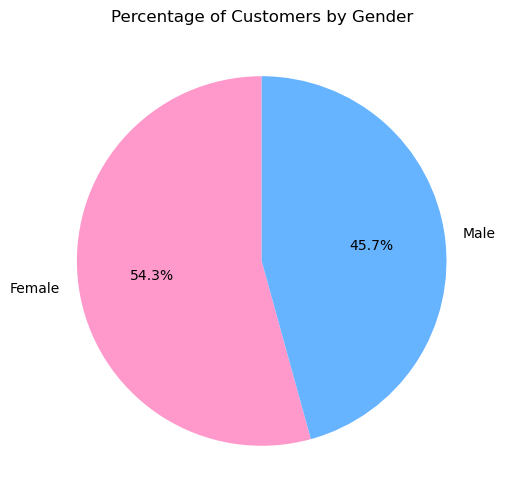

In [66]:
# Create a pie chart of gender percentages
# Set the figure size
fig = plt.figure(figsize=(6,6))

# Define the data and labels for the pie chart
labels = ['Female', 'Male']
sizes = [54.29, 45.71]

# Define the colors for the pie chart
colors = ['#ff99cc', '#66b3ff']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Percentage of Customers by Gender')

# Show the plot
plt.show()

From the analysis, it can be observed that the majority of the customers in the dataset are female (54.29%) while male customers make up a slightly smaller percentage (45.71%). This information could be useful in marketing campaigns and targeting specific products towards each gender to increase the likelihood of a successful sale.

In [23]:
# Count the number of customers in each segment using value_counts()
segment_counts = df_sorted['customer_segment'].value_counts()

# Calculate percentage of customers in each segment
total_customers = segment_counts.sum()
segment_percents = (segment_counts / total_customers) * 100

# Print the segment counts and percentages
print("Segment counts:\n", segment_counts)
print("\nSegment percentages:\n", segment_percents.apply(lambda x: '{:.2f}%'.format(x)))

Segment counts:
 Individuals         551435
College Graduate    350480
VIP                  36009
Name: customer_segment, dtype: int64

Segment percentages:
 Individuals         58.79%
College Graduate    37.37%
VIP                  3.84%
Name: customer_segment, dtype: object


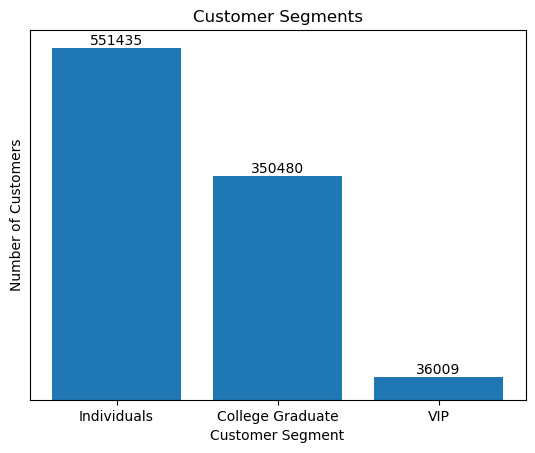

In [74]:
# Create a bar plot of the segment counts
plt.bar(segment_counts.index, segment_counts)

# Add axis labels and a title
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segments')

#Add labels to each bar
for i, v in enumerate(segment_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

#Remove y-axis 
plt.tick_params(axis='y', which='both', left=False, labelleft=False)

# Show the plot
plt.show()


The analysis shows that the majority of the bank's customers fall under the Individuals segment, with almost 59% of the total customer base. The College Graduate segment constitutes a significant portion, with 37% of the customers. The VIP segment is the smallest, with just under 4% of the customers. 

Based on these insights, the bank can tailor its marketing and product offerings to cater to the different customer segments. For example, the bank can introduce more student loan products for the College Graduate segment, while offering exclusive perks and personalized services to the VIP segment. Additionally, the bank can analyze the transactional behavior of each segment to gain more insights and develop more targeted marketing strategies.

In [24]:
# Count the number of active and inactive customers
activity_counts = df_sorted['activity_index'].value_counts()

# Rename the index labels from 0.0 to 'Inactive' and 1.0 to 'Active'
activity_counts = activity_counts.rename({0.0: 'Inactive', 1.0: 'Active'})

# Calculate percentage of active and inactive customers
total_customers = activity_counts.sum()
activity_percents = (activity_counts / total_customers) * 100

# Print the activity counts and percentages
print("Activity counts:\n", activity_counts)
print("\nActivity percentages:\n", activity_percents.apply(lambda x: '{:.2f}%'.format(x)))


Activity counts:
 Inactive    552638
Active      396971
Name: activity_index, dtype: int64

Activity percentages:
 Inactive    58.20%
Active      41.80%
Name: activity_index, dtype: object


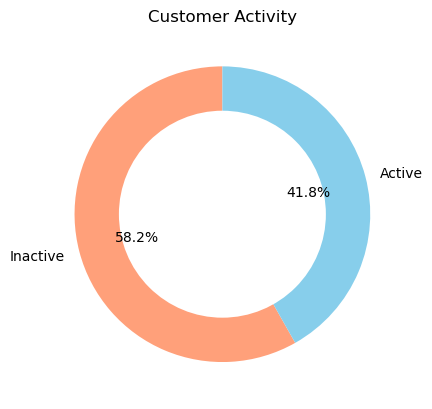

In [78]:
# Create a donut chart of the activity counts

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(activity_counts, labels=activity_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)

# Draw a circle in the middle of the chart to create the donut shape
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Add a title
plt.title('Customer Activity')

# Display the chart
plt.show()


The analysis shows that the majority of customers (58.20%) are inactive, while the remaining 41.80% are active. This could indicate a potential opportunity to engage and incentivize inactive customers to become more active, such as offering targeted promotions or improving customer service. On the other hand, it is also important to maintain the loyalty of active customers by continuing to provide high-quality products and services that meet their needs.

In [25]:
# Calculate the average age of customers
average_age = round(df_sorted['age'].mean())

# Print the average age
print("Average age of customers:", average_age)

Average age of customers: 40


In [40]:
# Creating age group and determining the number of customers in each age group
# Define age group bins and labels
bins = [0, 18, 25, 40, 60, np.inf]
labels = ['0-18', '19-25', '26-40', '41-60', '60+']

# Create a new column with the age group labels
df_sorted['age_group'] = pd.cut(df_sorted['age'], bins=bins, labels=labels)

# Reposition the 'age_group' column beside the age column

age_col_idx = df_sorted.columns.get_loc('age')  # get the index of the 'age' column
age_group_col = df_sorted.pop('age_group')  # remove the 'age_group' column from its current position
df_sorted.insert(age_col_idx + 1, 'age_group', age_group_col)  # insert the 'age_group' column after the 'age' column

# Count the number of customers in each age group using value_counts()
age_counts = df_sorted['age_group'].value_counts()

# Calculate percentage of customers in each age group
total_customers = age_counts.sum()
age_percents = (age_counts / total_customers) * 100

# Print the age counts and percentages
print("Age group counts:\n", age_counts)
print("\nAge group percentages:\n", age_percents.apply(lambda x: '{:.2f}%'.format(x)))

Age group counts:
 41-60    315840
19-25    264921
26-40    239993
60+      120651
0-18       8204
Name: age_group, dtype: int64

Age group percentages:
 41-60    33.26%
19-25    27.90%
26-40    25.27%
60+      12.71%
0-18      0.86%
Name: age_group, dtype: object


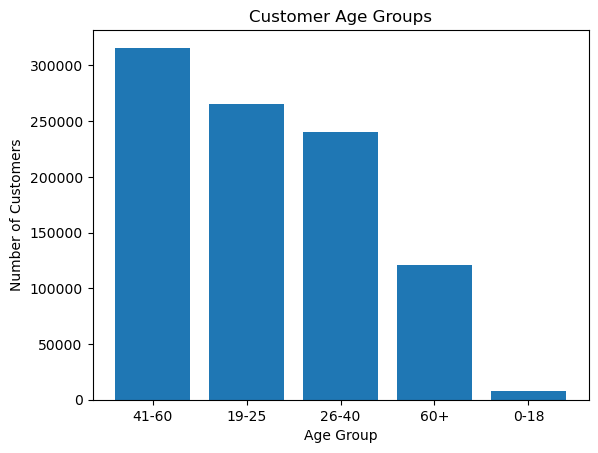

In [79]:
# Create a bar plot of the age group counts
plt.bar(age_counts.index, age_counts)

# Add axis labels and a title
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Customer Age Groups')

# Show the plot
plt.show()

From the analysis, we can see that the majority of customers fall in the age group of 41-60 years old, accounting for 33.26% of the total customers, followed by the age group of 19-25 years old, accounting for 27.90%. The least represented age group is 0-18 years old, accounting for only 0.86% of the total customers. 

These insights suggest that the bank can focus on targeting and tailoring their marketing strategies towards the 41-60 age group, as they represent the largest portion of their customer base. Additionally, there may be an opportunity to expand and attract younger customers, as the 19-25 age group accounts for a significant percentage of the customer base as well. 

The bank may also want to explore the reason for the low representation of the 0-18 age group and determine if there are any measures they can take to attract and retain younger customers.

In [42]:
# Get the counts of customers by country
country_counts = df_sorted['country_of_residence'].value_counts()

# Get the top 10 countries and their counts
top_countries = country_counts[:10]

# Combine the remaining countries into an 'Others' category
other_count = country_counts[10:].sum()
top_countries['Others'] = other_count

# Calculate the percentage of customers in each country
total_customers = country_counts.sum()
country_percents = (top_countries / total_customers) * 100

# Print the top 10 countries and their counts and percentages
print("Top 10 countries of residence:\n", top_countries)
print("\nPercentage of customers in each country:\n", country_percents.apply(lambda x: '{:.2f}%'.format(x)))

Top 10 countries of residence:
 ES        945592
FR           317
AR           289
GB           286
DE           285
US           230
CO           211
IT           180
RO           175
MX           157
Others      1887
Name: country_of_residence, dtype: int64

Percentage of customers in each country:
 ES        99.58%
FR         0.03%
AR         0.03%
GB         0.03%
DE         0.03%
US         0.02%
CO         0.02%
IT         0.02%
RO         0.02%
MX         0.02%
Others     0.20%
Name: country_of_residence, dtype: object


The vast majority of customers reside in Spain, with over 99% of the total customer base. The remaining top 10 countries of residence have very small percentages, with all but one (France) being less than 0.03%. The "Others" category represents a small fraction of the total customer base at 0.20%. It may be worthwhile for the company to explore expanding its customer base in other countries, but this should be done carefully and after conducting market research to determine the feasibility and potential profitability of such an expansion.

In [43]:
# Calculate the average income
average_income = df_sorted['gross_household_income'].mean()

# Print the average income
print("Average income:", average_income.round())

Average income: 134096.0


Average Gross Household Income = $134,096

In [86]:
# Count of customers by gross household income bands
# Define bins for gross_household_income
bins = [0, 50000, 100000, 150000, 200000, 300000, 500000, 1000000, 50000000]

# Create a new column with the income group labels
labels = [f"{bins[i]:,.0f} - {bins[i+1]:,.0f}" for i in range(len(bins)-1)]
df_sorted['income_group'] = pd.cut(df_sorted['gross_household_income'], bins=bins, labels=labels)

# Reposition the 'age_group' column beside the age column

gross_col_idx = df_sorted.columns.get_loc('gross_household_income')  # get the index of the 'gross_household_income' column
income_group_col = df_sorted.pop('income_group')  # remove the 'income_group' column from its current position
df_sorted.insert(gross_col_idx + 1, 'income_group', income_group_col)  # insert the 'income_group' column after the 'gross_household_income' column

# Count the number of customers in each income group using value_counts()
income_counts = df_sorted['income_group'].value_counts()

# Calculate percentage of customers in each income group
total_customers = income_counts.sum()
income_percents = (income_counts / total_customers) * 100

# Print the income counts and percentages
print("Income group counts:\n", income_counts)
print("\nIncome group percentages:\n", income_percents.apply(lambda x: '{:.2f}%'.format(x)))

Income group counts:
 50,000 - 100,000          272061
100,000 - 150,000         171483
150,000 - 200,000          85829
0 - 50,000                 75838
200,000 - 300,000          65826
300,000 - 500,000          29149
500,000 - 1,000,000         7442
1,000,000 - 50,000,000      1780
Name: income_group, dtype: int64

Income group percentages:
 50,000 - 100,000          38.35%
100,000 - 150,000         24.17%
150,000 - 200,000         12.10%
0 - 50,000                10.69%
200,000 - 300,000          9.28%
300,000 - 500,000          4.11%
500,000 - 1,000,000        1.05%
1,000,000 - 50,000,000     0.25%
Name: income_group, dtype: object


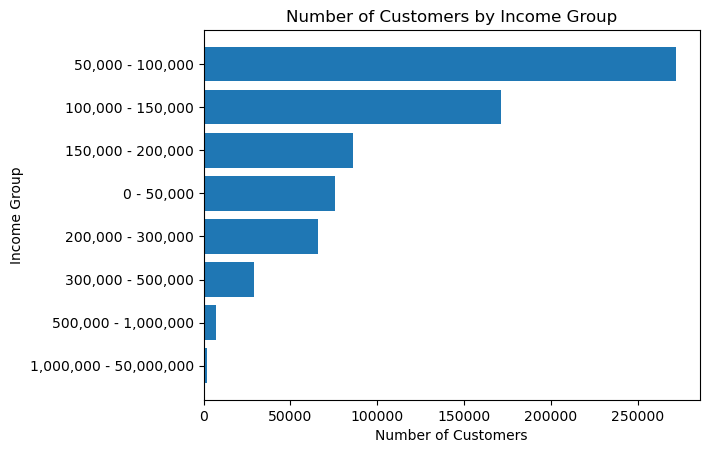

In [87]:
# Create a horizontal bar chart
plt.barh(income_counts.index, income_counts)

# Set the title and axes labels
plt.title("Number of Customers by Income Group")
plt.xlabel("Number of Customers")
plt.ylabel("Income Group")

# Invert the y-axis to show the income groups in descending order
plt.gca().invert_yaxis()

# Show the plot
plt.show()


The majority of the customers fall in the income group of 50,000 - 100,000, accounting for 38.35% of the total customers, followed by the income group of 100,000 - 150,000, accounting for 24.17%. Customers in the higher income groups such as 1,000,000 - 50,000,000 make up only a small percentage of the total customer base.

Based on this analysis, the bank can focus its marketing efforts towards the income groups with the highest representation, i.e., 50,000 - 100,000 and 100,000 - 150,000, to retain and attract more customers. Additionally, the bank can develop targeted marketing strategies for the higher income groups to expand its customer base. The bank can also use this information to develop personalized financial products and services to cater to the needs of customers in different income groups.

In [45]:
#Customer that joined within the last 6 months
new_customer_counts = df_sorted['new_customer'].value_counts()

# Rename the index labels from 0.0 to 'Old Customers' and 1.0 to 'New Customers'
new_customer_counts = new_customer_counts.rename({0.0: 'Old Customers', 1.0: 'New Customers'})

# Calculate percentage of active and inactive customers
total_customers = new_customer_counts.sum()
new_customer_percents = (new_customer_counts / total_customers) * 100

# Print the new customer counts and percentages
print("New customer counts:\n", new_customer_counts)
print("\nNew customer percentages:\n", new_customer_percents.apply(lambda x: '{:.2f}%'.format(x)))

New customer counts:
 Old Customers    906388
New Customers     43221
Name: new_customer, dtype: int64

New customer percentages:
 Old Customers    95.45%
New Customers     4.55%
Name: new_customer, dtype: object


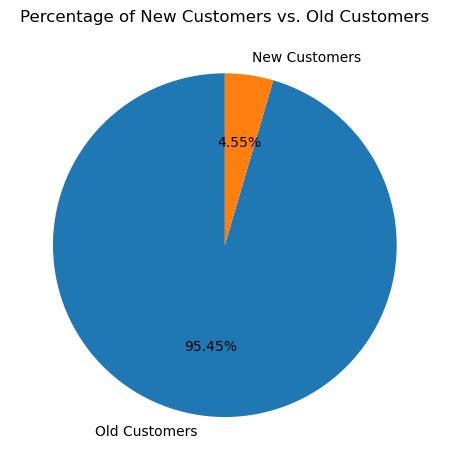

In [95]:
# Create a pie chart
fig, ax = plt.subplots()
ax.pie(new_customer_counts, labels=new_customer_counts.index, autopct='%1.2f%%', startangle=90)

# Add a title and adjust the layout
ax.set_title("Percentage of New Customers vs. Old Customers")
fig.tight_layout()

# Show the plot
plt.show()


Based on the analysis, only 4.55% of the customers are new, and the rest are existing customers. It might be worth investigating why the number of new customers is relatively low and what factors might be contributing to this. It could be an indication of poor marketing strategies or issues with customer retention. Recommendations to increase the number of new customers could include targeted advertising and promotions aimed at attracting new customers, improving customer experience to encourage customer loyalty, and creating referral programs to incentivize existing customers to refer new customers.

In [46]:
# Count number of customers with a current account
num_current_acc = df_sorted['current_acc'].sum()

# Calculate percentage of customers with a current account
total_customers = len(df_sorted)
percent_current_acc = (num_current_acc / total_customers) * 100

# Print results
print("Number of customers with a current account:", num_current_acc)
print("Percentage of customers with a current account: {:.2f}%".format(percent_current_acc))

Number of customers with a current account: 561810
Percentage of customers with a current account: 59.16%


In [47]:
# Count of customers with each product or account type  and the percentage of total
# Define the list of account types
account_types = ['current_acc', 'saving_acc', 'derivative_acc', 'guarantees', 'payroll_acc', 'junior_acc', 'more_particular_acc', 
                 'particular_acc', 'particular_plus_acc', 'short_term_deposits', 'medium_term_deposits', 'long_term_deposits', 
                 'e_account', 'funds', 'mortgage', 'pensions_plan', 'loans', 'taxes', 'credit_card', 'securities', 'home_acc', 
                 'payroll', 'pensions', 'direct_debit']

# Initialize a dictionary to store the number of customers for each account type
account_counts = {}

# Loop over the account types and count the number of customers for each type using sum()
for account in account_types:
    account_counts[account] = df_sorted[account].sum()

# Calculate the percentage of customers with each account type
total_customers = len(df_sorted)
account_percents = {account: (count / total_customers) * 100 for account, count in account_counts.items()}

# Print the account counts and percentages
for account in account_types:
    print(f"{account.capitalize()} accounts:")
    print(f"Number of customers: {account_counts[account]}")
    print(f"Percentage of total: {account_percents[account]:.2f}%\n")

Current_acc accounts:
Number of customers: 561810
Percentage of total: 59.16%

Saving_acc accounts:
Number of customers: 78
Percentage of total: 0.01%

Derivative_acc accounts:
Number of customers: 316
Percentage of total: 0.03%

Guarantees accounts:
Number of customers: 16
Percentage of total: 0.00%

Payroll_acc accounts:
Number of customers: 73067
Percentage of total: 7.69%

Junior_acc accounts:
Number of customers: 7587
Percentage of total: 0.80%

More_particular_acc accounts:
Number of customers: 8097
Percentage of total: 0.85%

Particular_acc accounts:
Number of customers: 100603
Percentage of total: 10.59%

Particular_plus_acc accounts:
Number of customers: 33274
Percentage of total: 3.50%

Short_term_deposits accounts:
Number of customers: 318
Percentage of total: 0.03%

Medium_term_deposits accounts:
Number of customers: 1021
Percentage of total: 0.11%

Long_term_deposits accounts:
Number of customers: 31218
Percentage of total: 3.29%

E_account accounts:
Number of customers: 7

In [102]:
# Define the account columns
account_cols = ['current_acc', 'saving_acc', 'derivative_acc', 'guarantees', 'payroll_acc', 'junior_acc', 'more_particular_acc', 'particular_acc', 'particular_plus_acc', 'short_term_deposits', 'medium_term_deposits', 'long_term_deposits', 'e_account', 'funds', 'mortgage', 'pensions_plan', 'loans', 'taxes', 'credit_card', 'securities', 'home_acc', 'payroll', 'pensions', 'direct_debit']

# Count the number of customers with each account type
account_counts = df_sorted[account_cols].sum()

# Calculate percentages of total
total_customers = len(df_sorted)
account_percents = (account_counts / total_customers) * 100

# Combine counts and percentages into a single DataFrame
account_df = pd.DataFrame({'counts': account_counts, 'percentages': account_percents.apply(lambda x: '{:.2f}%'.format(x))})

# Sort the DataFrame by count and percentage in descending order
account_df = account_df.sort_values(['counts', 'percentages'], ascending=False)

In [103]:
account_df

,counts,percentages
current_acc,561810.0,59.16%
direct_debit,113463.0,11.95%
particular_acc,100603.0,10.59%
e_account,75866.0,7.99%
payroll_acc,73067.0,7.69%
pensions,52909.0,5.57%
payroll,48361.0,5.09%
taxes,45890.0,4.83%
credit_card,34826.0,3.67%
particular_plus_acc,33274.0,3.50%


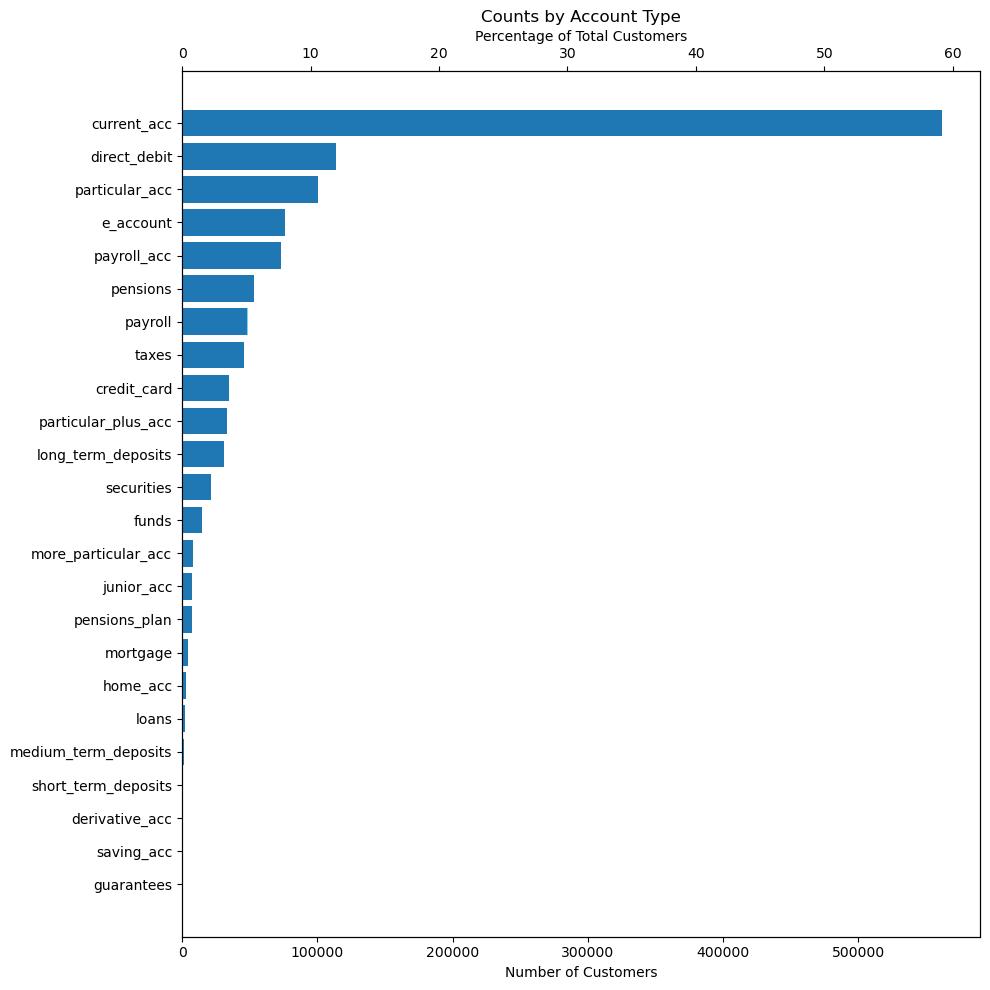

In [107]:
# Sort the DataFrame in descending order by counts
account_df = account_df.sort_values('counts', ascending=True)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(account_df.index, account_df['counts'], color='skyblue')
ax.set_title('Counts by Account Type')
ax.set_xlabel('Number of Customers')

# Add a secondary x-axis for the percentages
ax2 = ax.twiny()
ax2.barh(account_df.index, account_df['percentages'].str.rstrip('%').astype(float))
ax2.set_xlabel('Percentage of Total Customers')

# Adjust layout
fig.tight_layout()
plt.show()


The analysis provides insights into the distribution of accounts held by customers. The majority of the customers hold current accounts, followed by direct debit and particular accounts. The bank should monitor the usage patterns of different account types and adjust its marketing and promotional strategies accordingly. For instance, if the bank observes that the usage of particular accounts is declining, it can increase its promotional efforts for this account type to retain customers and attract new ones.

In [55]:
# Get the column index number of saving_acc (the first product in the columns)
saving_acc_index = df_sorted.columns.get_loc('saving_acc')

print(saving_acc_index)

26


In [56]:
# Count the number of banking products offered by the bank
bank_products = df_sorted.iloc[:, saving_acc_index:].shape[1]

print("Number of banking products available:", bank_products)

Number of banking products available: 24


In [124]:
# Count the number of products for each customer
product_counts = df_sorted.iloc[:, saving_acc_index:].sum(axis=1)

# Count the number of customers with each number of products
product_counts_counts = product_counts.value_counts()

# Combine the counts for customers with 10 or more products
product_counts_counts[10] = product_counts_counts[10:].sum()

# Remove counts for customers with more than 10 products
product_counts_counts = product_counts_counts[:10]

# Print the counts for each number of products
print("Number of bank products per customer:")
print(product_counts_counts)

# Calculate the percentages for each number of products
total_customers = len(df_sorted)
product_counts_percents = (product_counts_counts / total_customers) * 100

# Print the percentages for each number of products
print("\nPercentage of customers for each number of bank products:")
print(product_counts_percents.apply(lambda x: '{:.2f}%'.format(x))[:10])

Number of bank products per customer:
1.0     453809
0.0     252104
2.0     120653
3.0      47830
4.0      28772
5.0      18046
6.0      12689
7.0       8356
8.0       4445
9.0       1897
10.0      1008
dtype: int64

Percentage of customers for each number of bank products:
1.0     47.79%
0.0     26.55%
2.0     12.71%
3.0      5.04%
4.0      3.03%
5.0      1.90%
6.0      1.34%
7.0      0.88%
8.0      0.47%
9.0      0.20%
10.0     0.11%
dtype: object


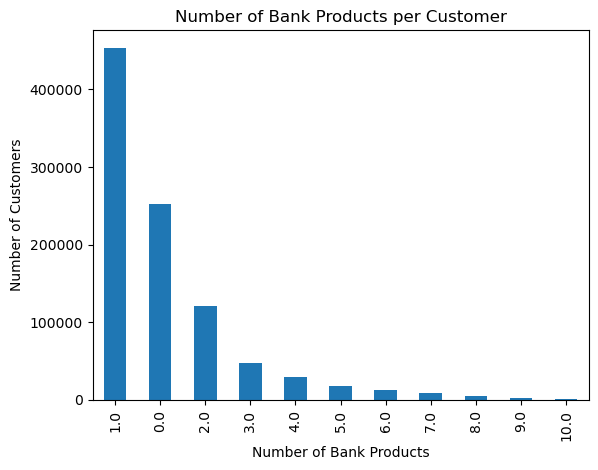

In [128]:
# Create a bar chart of the number of bank products per customer
product_counts_counts.plot(kind='bar')

# Set the chart title and axis labels
plt.title('Number of Bank Products per Customer')
plt.xlabel('Number of Bank Products')
plt.ylabel('Number of Customers')

# Display the chart
plt.show()

The analysis shows that almost half of the customers (47.79%) have only one bank product, while more than a quarter (26.55%) have no bank products. This indicates that there is a significant potential to increase the number of bank products held by customers.

It is important for the bank to identify the needs and preferences of its customers and offer them relevant products that could benefit them. The bank can use data analysis and machine learning techniques to segment its customers based on their behavior, preferences, and needs and then offer personalized product recommendations.

Moreover, the bank can also offer bundle products that provide a discount or some other incentive for customers to use multiple bank products. The bank can also incentivize customers to refer their friends and family to the bank, which can increase the bank's customer base and also lead to more product sales.

Overall, the bank needs to focus on improving customer engagement and loyalty to increase the number of bank products used by its customers.

### Cross Selling opportunities
Analyzing the co-ownership patterns of different banking products and identify potential cross-selling opportunities:


In [59]:
#Select the columns of interest
banking_products = ['saving_acc', 'guarantees', 'current_acc', 'derivative_acc', 'payroll_acc', 'junior_acc', 
                    'more_particular_acc', 'particular_acc', 'particular_plus_acc', 'short_term_deposits', 
                    'medium_term_deposits', 'long_term_deposits', 'e_account', 'funds', 'mortgage', 'pensions_plan', 
                    'loans', 'taxes', 'credit_card', 'securities', 'home_acc', 'payroll', 'pensions', 'direct_debit']

# Create a dictionary to store the co-ownership counts
coownership_counts = {}

# Loop through each product and count the number of customers who own both products
for i, product in enumerate(banking_products):
    for j in range(i+1, len(banking_products)):
        coownership = df_sorted[(df_sorted[product] == 1) & (df_sorted[banking_products[j]] == 1)].shape[0]
        coownership_counts[f'{product} & {banking_products[j]}'] = coownership

# Sort the co-ownership counts in descending order and display the top 10 opportunities for cross-selling
sorted_coownership_counts = sorted(coownership_counts.items(), key=lambda x: x[1], reverse=True)
for i in range(10):
    print(sorted_coownership_counts[i])


('current_acc & particular_acc', 65973)
('current_acc & direct_debit', 64638)
('payroll_acc & direct_debit', 51764)
('payroll_acc & pensions', 49197)
('payroll & pensions', 48361)
('payroll_acc & payroll', 45158)
('current_acc & e_account', 40840)
('pensions & direct_debit', 40762)
('payroll & direct_debit', 37379)
('e_account & direct_debit', 33568)


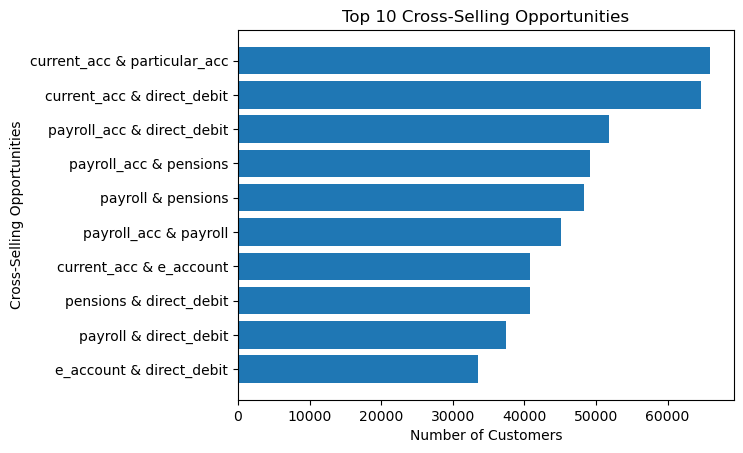

In [139]:
# Get the top 10 cross-selling opportunities
import matplotlib.pyplot as plt

# Get the top 10 cross-selling opportunities
top_opportunities = sorted_coownership_counts[:10]

# Extract the opportunity names and counts into separate lists
opportunity_names = [opportunity[0] for opportunity in top_opportunities]
opportunity_counts = [opportunity[1] for opportunity in top_opportunities]

# Reverse the lists to rank from highest to lowest
opportunity_names.reverse()
opportunity_counts.reverse()

# Create a horizontal bar chart of the top opportunities
plt.barh(opportunity_names, opportunity_counts)

# Add labels and a title to the chart
plt.xlabel('Number of Customers')
plt.ylabel('Cross-Selling Opportunities')
plt.title('Top 10 Cross-Selling Opportunities')

# Show the chart
plt.show()


Based on the co-ownership patterns identified, we can infer potential cross-selling opportunities. 

For example, since a large percentage of customers who own current accounts also own particular accounts, we can infer that there may be an opportunity to cross-sell particular accounts to current account customers. Similarly, customers who own payroll accounts are likely to be interested in pensions plans and direct debits, so cross-selling these products to them may prove to be beneficial. 

We also notice that a high percentage of customers who own payroll accounts also own direct debits, which could indicate that marketing payroll accounts to customers who already have direct debits could lead to an increased likelihood of cross-selling. 

Based on these insights, the bank can create targeted marketing campaigns to promote cross-selling opportunities. For instance, the bank can offer attractive packages that combine payroll accounts with pensions plans or direct debits. The bank can also offer incentives such as lower fees or interest rates to customers who have multiple products with them. By implementing these strategies, the bank can increase its cross-selling rates and generate more revenue from its existing customer base.

In [140]:
#View Final Table
df_sorted

,data_date,customer_id,employee_index,country_of_residence,gender,age,age_group,date_joined,new_customer,customer_seniority,primary_index,last_date_as_primary,customer_type,customer_relation,resident,foreigner,employee_spouse,channel,deceased,address_type,province_code,province_name,activity_index,gross_household_income,income_group,customer_segment,saving_acc,guarantees,current_acc,derivative_acc,payroll_acc,junior_acc,more_particular_acc,particular_acc,particular_plus_acc,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_plan,loans,taxes,credit_card,securities,home_acc,payroll,pensions,direct_debit
13026343,2016-05-28,15889,F,ES,F,56.0,41-60,1995-01-16,0.0,255,1.0,NaN,1,A,Yes,No,N,KAT,No,1.0,28.0,MADRID,1.0,326124.90,"300,000 - 500,000",VIP,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0
13026342,2016-05-28,15890,A,ES,F,63.0,60+,1995-01-16,0.0,256,1.0,NaN,1,A,Yes,No,N,KAT,No,1.0,28.0,MADRID,1.0,71461.20,"50,000 - 100,000",VIP,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1.0,1.0,1
5319232,2015-08-28,15891,N,ES,M,59.0,41-60,2015-07-28,0.0,246,99.0,2015-08-05,1,A,Yes,No,N,KAT,No,1.0,28.0,MADRID,0.0,NaN,NaN,Individuals,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13026341,2016-05-28,15892,F,ES,M,62.0,60+,1995-01-16,0.0,256,1.0,NaN,1,A,Yes,No,N,KAT,No,1.0,28.0,MADRID,1.0,430477.41,"300,000 - 500,000",VIP,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0.0,0.0,1
13026340,2016-05-28,15893,N,ES,F,63.0,60+,1997-10-03,0.0,256,1.0,NaN,1,A,Yes,No,N,KAT,No,1.0,28.0,MADRID,1.0,430477.41,"300,000 - 500,000",Individuals,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13336818,2016-05-28,1553685,N,ES,F,52.0,41-60,2016-05-31,1.0,0,1.0,NaN,NaN,NaN,Yes,No,NaN,NaN,No,1.0,13.0,CIUDAD REAL,0.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13336817,2016-05-28,1553686,N,ES,M,30.0,26-40,2016-05-31,1.0,0,1.0,NaN,NaN,NaN,Yes,Yes,NaN,NaN,No,1.0,41.0,SEVILLA,0.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13336816,2016-05-28,1553687,N,ES,F,21.0,19-25,2016-05-31,1.0,0,1.0,NaN,NaN,NaN,Yes,No,NaN,NaN,No,1.0,28.0,MADRID,0.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13336815,2016-05-28,1553688,N,ES,M,43.0,41-60,2016-05-31,1.0,0,1.0,NaN,NaN,NaN,Yes,No,NaN,NaN,No,1.0,39.0,CANTABRIA,0.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


## **Recommendations:**

Based on the analysis, here are some recommendations to increase cross-selling and revenue at XYZ Credit Union:

1.	Develop targeted marketing campaigns: Based on the insights gained from customer behavior analysis, develop targeted marketing campaigns to promote cross-selling of specific products to relevant customer segments. This could include personalized offers, incentives, and rewards to encourage customers to purchase additional products.
2.	Train employees on cross-selling: Ensure that employees are trained in cross-selling strategies and are equipped with the knowledge and skills to effectively promote additional products to customers. This could include offering incentives for successful cross-selling and providing ongoing training and support to employees.
3.	Streamline product offerings: Consider streamlining the bank's product offerings to reduce complexity and make it easier for customers to understand and purchase multiple products. This could include bundling products together or simplifying product names and descriptions.
4.	Improve customer experience: Focus on improving the overall customer experience to build trust and increase loyalty, which can lead to increased cross-selling opportunities. This could include providing personalized service, offering easy-to-use online and mobile banking tools, and responding quickly to customer inquiries and issues.
5. Focus on customers who own only one product: Given that nearly half of the customers own only one product, the bank can focus on this segment to cross-sell additional products. Targeted marketing campaigns can be developed to promote additional products to these customers, and employees can be trained to effectively promote these products to customers.
6. Analyze product bundles: Since customers who own multiple products tend to own specific combinations of products, the bank can analyze these combinations to identify product bundles that can be offered to customers at a discounted price. This can encourage customers to purchase additional products and lead to increased revenue for the bank.
7.	Analyze customer behavior: Conduct a thorough analysis of customer behavior to understand their preferences and identify patterns that can be used to drive cross-selling. This could include analyzing customer demographics, transaction history, and product ownership data to determine which products are most popular among which customer segments.
8. Leverage customer feedback: The bank can collect customer feedback to identify areas where improvements can be made to existing products or to develop new products that better meet customer needs. This can help the bank to better understand its customers and provide more targeted products and services.

By implementing these recommendations, XYZ Credit Union can improve cross-selling and increase revenue from existing customers.

